<a href="https://colab.research.google.com/github/azahradwp/Menu-Recommendation-System/blob/main/Assessment_Legit_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#FROM GOOGLE

In [ ]:
#Import library yang dibutuhkan

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gdown
from fastai.vision import *
from fastai.metrics import accuracy, top_k_accuracy
from annoy import AnnoyIndex
import zipfile
import time
from google.colab import drive
%matplotlib inline


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
#Import Library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('data.csv')
df.head()

,trx_date,trx_date_detail,sales_id,concept,brand,outlet,district,city,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender
0,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
1,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
2,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
3,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
4,2023-01-04,2023-01-04 20:26:46 UTC,02d6de17-9ca4-480f-b13c-7336dccd64b9,Lifestyle,A/A,"Apothecary, Gunawarman",Kebayoran Baru,Jakarta Selatan,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F


In [ ]:
#Data Exploration

df.isnull().sum()

trx_date                0
trx_date_detail         0
sales_id                0
concept                 0
brand                   0
outlet                  0
district                0
city                    0
menu_id                 0
menu_type               0
menu_category           0
menu_category_detail    0
menu_name               0
quantity                0
user_id                 0
user_created_at         0
user_tier_level         0
user_gender             0
dtype: int64

In [ ]:
df.describe()

,quantity
count,26804.000000
mean,1.163520
std,0.580635
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


In [ ]:
print("Data:",df.shape)

Data: (26804, 18)


In [ ]:
print(df.head())

     trx_date          trx_date_detail                              sales_id  \
0  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
1  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
2  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
3  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
4  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   

     concept brand                  outlet        district             city  \
0  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
1  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
2  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
3  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
4  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   

                                menu_id     

In [ ]:
df_cleaned = df.drop(columns=['trx_date', 'trx_date_detail', 'sales_id', 'concept','brand', 'outlet', 'district', 'city', 'user_created_at'])
print(df_cleaned.head())
print(df_cleaned.info())
print(df_cleaned.head(1)['user_id'])

                                menu_id        menu_type menu_category  \
0  5204e17e-aefb-4235-8eb8-7177a5679352        Ala Carte          FOOD   
1  1420bcef-ac34-4967-b5e0-4a2942f222a4  Package Content      BEVERAGE   
2  1420bcef-ac34-4967-b5e0-4a2942f222a4  Package Content      BEVERAGE   
3  77bb78c6-2f51-4f61-9d74-02d69388cef1  Package Content      BEVERAGE   
4  f026874c-5a66-4184-8ce0-9aeb9e37b5ac  Package Content       LIQUEUR   

  menu_category_detail               menu_name  quantity  \
0           APPETIZERS            French Fries       1.0   
1    BEVERAGE MODIFIER                  Single       1.0   
2    BEVERAGE MODIFIER                  Single       1.0   
3    BEVERAGE MODIFIER               Coca Cola       1.0   
4            WHISK(E)Y  Monkey Shoulder_Double       1.0   

                                user_id      user_created_at user_tier_level  \
0  db0df3a5-2d00-4fed-93b1-99ea1eedccd8  2021-05-13 07:41:27            Gold   
1  db0df3a5-2d00-4fed-93b1-99ea1ee

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

In [ ]:
# Fitting the TF-IDF on the 'user_id' text
tfv_matrix = tfv.fit_transform(df_cleaned['user_id'])
print(tfv_matrix)
print(tfv_matrix.shape)

  (0, 4887)	0.28867513459481287
  (0, 1226)	0.28867513459481287
  (0, 10508)	0.28867513459481287
  (0, 7337)	0.28867513459481287
  (0, 4886)	0.28867513459481287
  (0, 1225)	0.28867513459481287
  (0, 10507)	0.28867513459481287
  (0, 7670)	0.28867513459481287
  (0, 7336)	0.28867513459481287
  (0, 4885)	0.28867513459481287
  (0, 1224)	0.28867513459481287
  (0, 10506)	0.28867513459481287
  (1, 4887)	0.28867513459481287
  (1, 1226)	0.28867513459481287
  (1, 10508)	0.28867513459481287
  (1, 7337)	0.28867513459481287
  (1, 4886)	0.28867513459481287
  (1, 1225)	0.28867513459481287
  (1, 10507)	0.28867513459481287
  (1, 7670)	0.28867513459481287
  (1, 7336)	0.28867513459481287
  (1, 4885)	0.28867513459481287
  (1, 1224)	0.28867513459481287
  (1, 10506)	0.28867513459481287
  (2, 4887)	0.28867513459481287
  :	:
  (26801, 282)	0.28867513459481287
  (26802, 4505)	0.28867513459481287
  (26802, 3213)	0.28867513459481287
  (26802, 284)	0.28867513459481287
  (26802, 6344)	0.28867513459481287
  (26802, 

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
print(sig[0])

[0.76163085 0.76163085 0.76163085 ... 0.76159416 0.76159416 0.76159416]


In [ ]:
# Reverse mapping of indices and movie titles
indices = pd.Series(df_cleaned.index, index=df_cleaned['menu_name']).drop_duplicates()
print(indices)
print(indices['French Fries'])
print(sig[4799])
print(list(enumerate(sig[indices['French Fries']])))
print(sorted(list(enumerate(sig[indices['French Fries']])), key=lambda x: x[1], reverse=True))

menu_name
French Fries                            0
Single                                  1
Single                                  2
Coca Cola                               3
Monkey Shoulder_Double                  4
                                    ...  
Brownies&Cream                      26799
Setengah Matang                     26800
Hot                                 26801
Long Black                          26802
American Grilled Cheese Sandwich    26803
Length: 26804, dtype: int64
menu_name
French Fries        0
French Fries      732
French Fries     1140
French Fries     5318
French Fries     5884
French Fries     5903
French Fries     6857
French Fries     8673
French Fries    12460
French Fries    14585
French Fries    18740
French Fries    18794
French Fries    18918
French Fries    18932
French Fries    19047
French Fries    19060
French Fries    19072
French Fries    19133
French Fries    19175
French Fries    19177
dtype: int64
[0.76159416 0.76159416 0.76159416 ...

ValueError: ignored

In [ ]:
from pandas.compat.numpy.function import MEDIAN_DEFAULTS
def give_recomendations(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Menu indices
    menu_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return df_cleaned['menu_name'].iloc[menu_indices]

In [ ]:
print(give_recomendations('Coca Cola'))

ValueError: ignored

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Fitting the TF-IDF on the 'user_id' text
user_item_matrix = tfv.fit_transform(df_cleaned['user_id'])
print(user_item_matrix)
print(user_item_matrix.shape)

  (0, 4887)	0.28867513459481287
  (0, 1226)	0.28867513459481287
  (0, 10508)	0.28867513459481287
  (0, 7337)	0.28867513459481287
  (0, 4886)	0.28867513459481287
  (0, 1225)	0.28867513459481287
  (0, 10507)	0.28867513459481287
  (0, 7670)	0.28867513459481287
  (0, 7336)	0.28867513459481287
  (0, 4885)	0.28867513459481287
  (0, 1224)	0.28867513459481287
  (0, 10506)	0.28867513459481287
  (1, 4887)	0.28867513459481287
  (1, 1226)	0.28867513459481287
  (1, 10508)	0.28867513459481287
  (1, 7337)	0.28867513459481287
  (1, 4886)	0.28867513459481287
  (1, 1225)	0.28867513459481287
  (1, 10507)	0.28867513459481287
  (1, 7670)	0.28867513459481287
  (1, 7336)	0.28867513459481287
  (1, 4885)	0.28867513459481287
  (1, 1224)	0.28867513459481287
  (1, 10506)	0.28867513459481287
  (2, 4887)	0.28867513459481287
  :	:
  (26801, 282)	0.28867513459481287
  (26802, 4505)	0.28867513459481287
  (26802, 3213)	0.28867513459481287
  (26802, 284)	0.28867513459481287
  (26802, 6344)	0.28867513459481287
  (26802, 

In [ ]:
# Split data into training and test sets
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(train_matrix.T)

# Function to recommend menus for a user based on user-item interaction and item similarity
def recommend_menus(user_id, num_recommendations=3):
    user_preferences = train_matrix[user_id]
    item_scores = np.dot(user_preferences, item_similarity)

    # Sort item scores in descending order and get top recommendations
    recommended_item_indices = np.argsort(item_scores)[::-1][:num_recommendations]
    return recommended_item_indices

# User ID for which we want to recommend menus (assuming user_id is an index)
target_user_id = 2
recommended_indices = recommend_menus(target_user_id)

print("Recommended Menu Indices:", recommended_indices)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Sample data: user-item interaction matrix
# Each row represents a user, each column represents an item (menu item), and the values represent user preferences/ratings.
user_item_matrix = np.array([
    [5, 0, 4, 3, 0, 0],
    [0, 0, 5, 0, 2, 4],
    [3, 0, 0, 0, 0, 0],
    [0, 5, 4, 0, 1, 0],
    [0, 0, 0, 2, 0, 5]
])

# Split data into training and test sets
train_matrix, test_matrix = train_test_split(user_item_matrix, test_size=0.2, random_state=42)

# Calculate item-item similarity using cosine similarity
item_similarity = cosine_similarity(train_matrix.T)

# Function to recommend menus for a user based on user-item interaction and item similarity
def recommend_menus(user_id, num_recommendations=3):
    user_preferences = train_matrix[user_id]
    item_scores = np.dot(user_preferences, item_similarity)

    # Sort item scores in descending order and get top recommendations
    recommended_item_indices = np.argsort(item_scores)[::-1][:num_recommendations]
    return recommended_item_indices

# User ID for which we want to recommend menus (assuming user_id is an index)
target_user_id = 2
recommended_indices = recommend_menus(target_user_id)

print("Recommended Menu Indices:", recommended_indices)


Recommended Menu Indices: [0 3 2]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess your dataset
data = pd.read_csv('customer_data.csv')
data = data.dropna()  # Handling missing values
X = data.drop(['CustomerID'], axis=1)  # Drop unnecessary columns

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (k)
k = 5

# Train KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='rainbow')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Customer Segmentation')
plt.show()


FileNotFoundError: ignored

#FROM YOUTUBE

In [ ]:
#FOOD RECOMMENDATION SYSTEM

#Import Library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

#
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Import File
from google.colab import files
uploaded = files.upload()

In [ ]:
#Reading file
df = pd.read_csv('data.csv')
print(df)

         trx_date          trx_date_detail  \
0      2023-01-04  2023-01-04 20:26:46 UTC   
1      2023-01-04  2023-01-04 20:26:46 UTC   
2      2023-01-04  2023-01-04 20:26:46 UTC   
3      2023-01-04  2023-01-04 20:26:46 UTC   
4      2023-01-04  2023-01-04 20:26:46 UTC   
...           ...                      ...   
26799  2023-01-01  2023-01-01 21:46:16 UTC   
26800  2023-01-01  2023-01-01 21:46:16 UTC   
26801  2023-01-01  2023-01-01 21:46:16 UTC   
26802  2023-01-01  2023-01-01 21:46:16 UTC   
26803  2023-01-01  2023-01-01 21:46:16 UTC   

                                   sales_id    concept brand  \
0      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
1      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
2      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
3      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
4      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
...                                     ...        ...   ...   

In [ ]:
#Pivot Table
dataset = df.pivot_table(index='menu_id', columns='user_id', values='menu_name')
dataset.fillna(0, inplace= True)
print(dataset)

Empty DataFrame
Columns: []
Index: [00158298-50f1-4159-9fc8-9dcccfa4f14b, 0037ebd3-b661-477e-97d6-65726687272b, 0067d193-17b3-4b5d-99fc-7333e7e981e8, 0072af0f-0bd8-4df3-8e0f-a8f0de658fdb, 007e7214-7674-4897-aa94-3624cc27b7c9, 007eb7e6-fec5-4f19-af66-b6dc839bc8d5, 00a072a8-8144-4d75-89f3-856209225d3c, 00ac4232-62eb-45e3-a3b0-093226c997d9, 00b585fe-e5a9-44b6-94f2-e86cb5557274, 00bc1fed-4bd5-48e3-bed8-f36202c0d976, 00c8e8cf-a32e-45ba-9092-2746d1a9c8f3, 00e10747-c7bd-4586-ad0d-b751159efa92, 012be1ab-545e-4de6-be40-72b1b21489f1, 012e6360-b461-469e-9847-2fb906338ce7, 015d62bd-8691-4b9f-b489-d5d3902fdb36, 017ae9ed-566d-49da-aa44-b568e5f4ba1f, 0180660a-0246-4492-8777-7214f76dac2e, 018fe39a-6daa-4c51-8a78-b453dea96e2e, 0193983f-a95d-4c05-80b0-0355f3bf6e75, 01bbd4a4-d7fd-4951-86fd-e5a36dfb8c93, 01c11f03-ab50-43c0-be7d-b1bc0ac84261, 01c6c3fc-ef3c-4901-aace-a77f58a66e72, 01d5d9fc-2400-4f2d-9676-05c16650b1bb, 01dafb26-96b3-4530-8889-4f6dc5c41c01, 01dd0e36-6fef-43d0-8467-8f6e6caecf70, 01fbdea1-e73a-

<ipython-input-8-d2b086de0953>:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  dataset = df.pivot_table(index='menu_id', columns='user_id', values='menu_name')


In [ ]:
#Recommendation Function
def food_recommendation(Food_Name):
  n = 10
  FoodList = df[df['Name'].str.contains(Food_Name)]
  if len(FoodList):
    Foodi = FoodList.iloc[0]['menu_id']
    Foodi = dataset[dataset['menu_id'] == Foodi].index[0]
    distances , indices = model.kneighbors(csr_dataset[Foodi], n_neighbors = n+1)
    Food_indices = sorted(list(zip(indices.squeeze().tolist(), distance.squeeze().tolist())), key = lambda
    Recommendations = []
    for val in Food_indices:
        Foodi = dataset.iloc[val[0]]['menu_id']
        i = food[]


#CHAT GPT

In [ ]:
df_cleaned = df.drop(columns=['trx_date', 'trx_date_detail', 'sales_id', 'concept','brand', 'outlet', 'district', 'city', 'user_created_at'])
print(df_cleaned.head())
print(df_cleaned.info())
print(df_cleaned.head(1)['user_id'])

                                menu_id        menu_type menu_category  \
0  5204e17e-aefb-4235-8eb8-7177a5679352        Ala Carte          FOOD   
1  1420bcef-ac34-4967-b5e0-4a2942f222a4  Package Content      BEVERAGE   
2  1420bcef-ac34-4967-b5e0-4a2942f222a4  Package Content      BEVERAGE   
3  77bb78c6-2f51-4f61-9d74-02d69388cef1  Package Content      BEVERAGE   
4  f026874c-5a66-4184-8ce0-9aeb9e37b5ac  Package Content       LIQUEUR   

  menu_category_detail               menu_name  quantity  \
0           APPETIZERS            French Fries       1.0   
1    BEVERAGE MODIFIER                  Single       1.0   
2    BEVERAGE MODIFIER                  Single       1.0   
3    BEVERAGE MODIFIER               Coca Cola       1.0   
4            WHISK(E)Y  Monkey Shoulder_Double       1.0   

                                user_id user_tier_level user_gender  
0  db0df3a5-2d00-4fed-93b1-99ea1eedccd8            Gold           F  
1  db0df3a5-2d00-4fed-93b1-99ea1eedccd8            Gol

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (replace 'interaction_matrix.csv' with your actual dataset)
interaction_matrix = pd.read_csv('data.csv', index_col=0)

# Convert the interaction matrix to a NumPy array
user_item_matrix = interaction_matrix.values

# Calculate user-user cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Function to recommend menus for a user based on user-user similarity
def recommend_menus(user_id, num_recommendations=5):
    user_index = interaction_matrix.index.get_loc(user_id)
    user_similarities = user_similarity[user_index]

    # Sort user similarities in descending order and get top similar users
    similar_users = np.argsort(user_similarities)[::-1][1:num_recommendations+1]

    # Aggregate menu recommendations from similar users
    recommended_menus = []
    for similar_user in similar_users:
        recommended_menus.extend(np.where(user_item_matrix[similar_user] > 0)[0])

    # Remove items already interacted with by the target user
    recommended_menus = set(recommended_menus) - set(np.where(user_item_matrix[user_index] > 0)[0])

    return list(recommended_menus)[:num_recommendations]

# User ID for which we want to recommend menus
target_user_id = '0b826949-4772-4de9-8144-1d9beceb7481'
top_recommendations = recommend_menus(target_user_id)

print("Top Menu Recommendations:", top_recommendations)


ValueError: ignored

#THE REAL ANSWER

In [1]:
#MENU RECOMMENDATION SYSTEM

#Import Library yang dibutuhkan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

#
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Import File
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
#Reading file
df = pd.read_csv('data.csv')
print(df)

         trx_date          trx_date_detail  \
0      2023-01-04  2023-01-04 20:26:46 UTC   
1      2023-01-04  2023-01-04 20:26:46 UTC   
2      2023-01-04  2023-01-04 20:26:46 UTC   
3      2023-01-04  2023-01-04 20:26:46 UTC   
4      2023-01-04  2023-01-04 20:26:46 UTC   
...           ...                      ...   
26799  2023-01-01  2023-01-01 21:46:16 UTC   
26800  2023-01-01  2023-01-01 21:46:16 UTC   
26801  2023-01-01  2023-01-01 21:46:16 UTC   
26802  2023-01-01  2023-01-01 21:46:16 UTC   
26803  2023-01-01  2023-01-01 21:46:16 UTC   

                                   sales_id    concept brand  \
0      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
1      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
2      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
3      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
4      02d6de17-9ca4-480f-b13c-7336dccd64b9  Lifestyle   A/A   
...                                     ...        ...   ...   

In [ ]:
#Data Exploration

df.isnull().sum()

trx_date                0
trx_date_detail         0
sales_id                0
concept                 0
brand                   0
outlet                  0
district                0
city                    0
menu_id                 0
menu_type               0
menu_category           0
menu_category_detail    0
menu_name               0
quantity                0
user_id                 0
user_created_at         0
user_tier_level         0
user_gender             0
dtype: int64

In [ ]:
print(df.head())

     trx_date          trx_date_detail                              sales_id  \
0  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
1  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
2  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
3  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   
4  2023-01-04  2023-01-04 20:26:46 UTC  02d6de17-9ca4-480f-b13c-7336dccd64b9   

     concept brand                  outlet        district             city  \
0  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
1  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
2  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
3  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   
4  Lifestyle   A/A  Apothecary, Gunawarman  Kebayoran Baru  Jakarta Selatan   

                                menu_id     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26804 entries, 0 to 26803
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   trx_date              26804 non-null  object 
 1   trx_date_detail       26804 non-null  object 
 2   sales_id              26804 non-null  object 
 3   concept               26804 non-null  object 
 4   brand                 26804 non-null  object 
 5   outlet                26804 non-null  object 
 6   district              26804 non-null  object 
 7   city                  26804 non-null  object 
 8   menu_id               26804 non-null  object 
 9   menu_type             26804 non-null  object 
 10  menu_category         26804 non-null  object 
 11  menu_category_detail  26804 non-null  object 
 12  menu_name             26804 non-null  object 
 13  quantity              26804 non-null  float64
 14  user_id               26804 non-null  object 
 15  user_created_at    

In [ ]:
#Construct the Interaction Matrix

#Create a user-item interaction matrix
interaction_matrix = pd.pivot_table(df, values='quantity', index='user_id', columns='menu_id', fill_value=0)

# Convert the interaction matrix to a NumPy array
interaction_matrix_array = interaction_matrix.to_numpy()

# Print the interaction matrix
print(interaction_matrix)


menu_id                               00158298-50f1-4159-9fc8-9dcccfa4f14b  \
user_id                                                                      
00b158ed-0fcb-48e1-b627-2bb572a344cf                                     0   
00bafc5b-3e97-439c-8b1f-9a6568adbaaa                                     0   
00cf8833-2cd5-40df-8477-3e9b73dbdb66                                     0   
0120f7c6-b3e7-4ff3-9082-90d311ca16f7                                     0   
014fc003-3f5b-4294-b2e6-836a17a0ed79                                     0   
...                                                                    ...   
fe476c7f-6392-43b4-887a-602372a7dfce                                     0   
fe8b2cb6-180e-443b-bb69-d44038034bd9                                     0   
ff13b265-54d4-48c4-8b51-f2e29e024e54                                     0   
ff39dbcb-4414-45b3-8fa0-92577d1c78b8                                     0   
ffde4412-810f-4800-a40b-27ad2a614a9e                            

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset (replace 'data.csv' with your actual dataset)
data = pd.read_csv('data.csv')

# Create a TF-IDF vectorizer for menu attributes
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
menu_features = vectorizer.fit_transform(data['menu_type'] + ' ' + data['menu_category'])

# Calculate cosine similarity between menu features
menu_similarity = cosine_similarity(menu_features)

# Create a user-menu interaction matrix
interaction_matrix = pd.pivot_table(data, values='quantity', index='user_id', columns='menu_id', fill_value=0)

# Function to recommend menus for a user
def recommend_menus(user_id, num_recommendations=5):
    user_interactions = interaction_matrix.loc[user_id]
    similar_menus = []

    for menu_id in user_interactions.index:
        menu_index = data[data['menu_id'] == menu_id].index[0]
        similar_menus.extend([(other_menu_id, similarity) for other_menu_id, similarity in enumerate(menu_similarity[menu_index])])

    similar_menus.sort(key=lambda x: x[1], reverse=True)

    recommended_menu_indices = [menu_id for menu_id, _ in similar_menus[:num_recommendations]]
    recommended_menus = data.loc[recommended_menu_indices, 'menu_name']

    return recommended_menus

# User ID for which we want to recommend menus
target_user_id = '72512d30-7126-4b6c-91ce-1a3f00fba4b5'
top_recommendations = recommend_menus(target_user_id)

print("Top Menu Recommendations:")
print(top_recommendations)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8088.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2610, cost: 8424.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3269, cost: 7644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3713, cost: 8747.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3215, cost: 10628.0
Best run was number 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


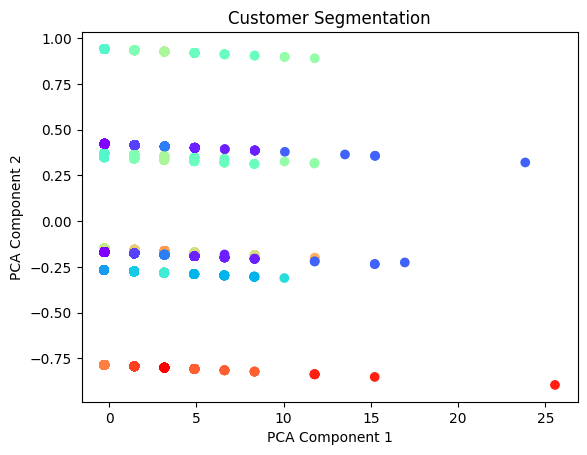

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
!pip install KModes
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset (replace 'data.csv' with your actual dataset)
data = pd.read_csv('data.csv')

# Select relevant features for segmentation
selected_features = data[['user_tier_level', 'user_gender', 'quantity']]

# One-hot encode categorical variables
categorical_features = selected_features[['user_tier_level', 'user_gender']]
categorical_features_encoded = pd.get_dummies(categorical_features, drop_first=True)

# Scale numerical feature
numerical_feature = selected_features[['quantity']]
scaler = StandardScaler()
numerical_feature_scaled = scaler.fit_transform(numerical_feature)

# Combine encoded categorical features and scaled numerical feature
preprocessed_features = pd.concat([categorical_features_encoded, pd.DataFrame(numerical_feature_scaled, columns=['quantity'])], axis=1)

# Choose the number of clusters (segments)
num_clusters = 5

# Train K-Modes model for categorical features
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
categorical_clusters = kmodes.fit_predict(categorical_features_encoded)

# Train K-Means model for numerical features
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
numerical_clusters = kmeans.fit_predict(numerical_feature_scaled)

# Combine cluster labels
cluster_labels = categorical_clusters * num_clusters + numerical_clusters

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(preprocessed_features)

# Visualize clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='rainbow')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation')
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
!pip install KModes
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans

# Load your dataset (replace 'data.csv' with your actual dataset)
data = pd.read_csv('data.csv')

# Preprocess data and extract relevant features
selected_features = data[['user_tier_level', 'user_gender', 'quantity']]

# One-hot encode categorical variables
categorical_features = selected_features[['user_tier_level', 'user_gender']]
categorical_features_encoded = pd.get_dummies(categorical_features, drop_first=True)

# Scale numerical feature
numerical_feature = selected_features[['quantity']]
scaler = StandardScaler()
numerical_feature_scaled = scaler.fit_transform(numerical_feature)

# Combine encoded categorical features and scaled numerical feature
preprocessed_features = pd.concat([categorical_features_encoded, pd.DataFrame(numerical_feature_scaled, columns=['quantity'])], axis=1)

# Choose the number of clusters (segments)
num_clusters = 4

# Train K-Modes model for categorical features
kmodes = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
categorical_clusters = kmodes.fit_predict(categorical_features_encoded)

# Train K-Means model for numerical features
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
numerical_clusters = kmeans.fit_predict(numerical_feature_scaled)

# Combine cluster labels
cluster_labels = categorical_clusters * num_clusters + numerical_clusters

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Define actionable treatments for each segment
segment_treatments = {
    0: "Special promotion for high-tier users",
    1: "Personalized menu recommendations",
    2: "Exclusive brand vouchers",
    3: "Tailored marketing campaigns"
}

# Assign treatments to each customer based on their segment
data['treatment'] = data['cluster'].map(segment_treatments)

# Print out treatments for a sample customer
sample_user_id = 'ffde4412-810f-4800-a40b-27ad2a614a9e'
user_segment = data[data['user_id'] == sample_user_id]['cluster'].values[0]
user_treatment = data[data['user_id'] == sample_user_id]['treatment'].values[0]
print(f"User '{sample_user_id}' belongs to segment {user_segment} and should receive treatment: {user_treatment}")


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1225, cost: 14538.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 12687.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 4440, cost: 10874.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 11356.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 3215, cost: 12137.0
Best run was number 3
User 'ffde4412-810f-4800-a40b-27ad2a614a9e' belongs to segment 4 and should receive treatment: nan


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#DARI SEPHI

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow import keras
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#membaca dataset
path = '/content/drive/MyDrive/Dataset/data.csv'
df = pd.read_csv(path)
df = df.drop(columns=["trx_date", "trx_date_detail", "sales_id", "concept", "brand", "outlet", "district", "city"])
df.head(14)

,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender
0,5204e17e-aefb-4235-8eb8-7177a5679352,Ala Carte,FOOD,APPETIZERS,French Fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
1,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
2,1420bcef-ac34-4967-b5e0-4a2942f222a4,Package Content,BEVERAGE,BEVERAGE MODIFIER,Single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
3,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
4,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,Package Content,LIQUEUR,WHISK(E)Y,Monkey Shoulder_Double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
5,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
6,77bb78c6-2f51-4f61-9d74-02d69388cef1,Package Content,BEVERAGE,BEVERAGE MODIFIER,Coca Cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
7,cfa23fc2-c4ab-4377-b0fe-489493016af1,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
8,9708a976-0852-4705-a619-359447db7b09,Ala Carte,LIQUEUR,CLASSIC COCKTAIL,Lemon Drop,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F
9,cfa23fc2-c4ab-4377-b0fe-489493016af1,Package Head,LIQUEUR,SINGLE MALT,Lagavulin 16 YO (Glass),1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,Gold,F


In [6]:
df.describe()

,quantity
count,26804.000000
mean,1.163520
std,0.580635
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,16.000000


In [7]:
#fungsi membuat teks menjadi lowercase
def toLowercase(df):
  return [str(lower).lower() for lower in df]
#fungsi membuat teks menjadi list
def toList(df):
    return [i.split(', ') for i in df]

In [8]:
features = ["menu_type", "menu_category", "menu_category_detail", "menu_name"]
for feature in features:
  df[feature] = toLowercase(df[feature])

In [12]:
try:
  df['user_tier_level']=toList(df['user_tier_level'])
  df['user_gender']=toList(df['user_gender'])
except:
  print('Sudah diubah')
df.head()

Sudah diubah


,menu_id,menu_type,menu_category,menu_category_detail,menu_name,quantity,user_id,user_created_at,user_tier_level,user_gender,rentang usia,kategori
0,5204e17e-aefb-4235-8eb8-7177a5679352,ala carte,food,appetizers,french fries,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,[Gold],[F],[Gold],[F]
1,1420bcef-ac34-4967-b5e0-4a2942f222a4,package content,beverage,beverage modifier,single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,[Gold],[F],[Gold],[F]
2,1420bcef-ac34-4967-b5e0-4a2942f222a4,package content,beverage,beverage modifier,single,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,[Gold],[F],[Gold],[F]
3,77bb78c6-2f51-4f61-9d74-02d69388cef1,package content,beverage,beverage modifier,coca cola,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,[Gold],[F],[Gold],[F]
4,f026874c-5a66-4184-8ce0-9aeb9e37b5ac,package content,liqueur,whisk(e)y,monkey shoulder_double,1.0,db0df3a5-2d00-4fed-93b1-99ea1eedccd8,2021-05-13 07:41:27,[Gold],[F],[Gold],[F]


In [11]:
df['user_tier_level'][35]

['Gold']

In [13]:
import itertools
list_kategori = df['user_tier_level']
list_kategori = list(itertools.chain(*list_kategori))

from collections import Counter
df_kategori_count = pd.DataFrame(Counter(list_kategori).most_common(), columns=['level', 'Jumlah'])
df_kategori_count

,level,Jumlah
0,Basic,9125
1,Silver,7976
2,Diamond,5879
3,Gold,3284
4,Black,540


In [14]:
get_col = pd.DataFrame(columns=df_kategori_count['level'].values)
get_col.to_csv('output.csv')

In [15]:
import itertools
list_gender = df['user_gender']
list_gender = list(itertools.chain(*list_gender))

from collections import Counter
df_gender_count = pd.DataFrame(Counter(list_gender).most_common(), columns=['gender', 'Jumlah'])
df_gender_count

,gender,Jumlah
0,F,15382
1,M,11422


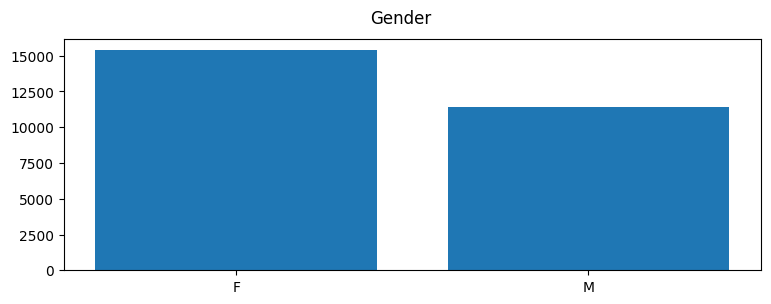

In [17]:
plt.figure(figsize=(9, 3))

# plt.subplot()
plt.bar(df_gender_count['gender'], df_gender_count['Jumlah'])
plt.suptitle('Gender')
plt.show()

In [18]:
encode = preprocessing.LabelEncoder()

In [ ]:
# encode_kategori = encode.fit_transform(df_kategori_count['kategori'])
# encode_kategori.shape
# encode_usia = encode.fit_transform(df_usia_count['rentang usia'])
# pd.DataFrame({'usia':df_usia_count['rentang usia'],'encode_usia':encode_usia})
# encode_usia

In [20]:
jenis_kategori = df_kategori_count['level'].values.tolist()
num_categories = len(jenis_kategori)

def encode_category(category):
    # Membuat vektor nol dengan panjang yang sama dengan jumlah kategori
    encoded_category = [0] * num_categories

    for i in category:
      # Menentukan indeks kategori yang sesuai
      category_index = jenis_kategori.index(i)

      # Mengatur nilai 1 pada indeks kategori yang sesuai
      encoded_category[category_index] = 1


    return encoded_category

encoded = []
for kategori in df['user_tier_level']:
  encoded_category = encode_category(kategori)
  encoded.append(encoded_category)

In [ ]:
# pd.DataFrame([i for i in encoded] ,columns=df_kategori_count['kategori'])

In [ ]:
df_usia_count['rentang usia']

0     umum
1    18-25
2    26-35
3    15-17
4    36-45
5    46-55
Name: rentang usia, dtype: object

In [ ]:
jenis_usia = df_usia_count['rentang usia'].values.tolist()
jumlah_jenis_usia = len(jenis_usia)

def encode_usia(usia,user = False):
    # Membuat vektor nol dengan panjang yang sama dengan jumlah usia
    encoded_usia = [0] * jumlah_jenis_usia

    for i in usia:
      # Menentukan indeks usia yang sesuai
      usia_index = jenis_usia.index(i)

      # Mengatur nilai 1 pada indeks usia yang sesuai
      encoded_usia[usia_index] = 1

    if user:
      encoded_usia[0] = 1

    return encoded_usia

usia_encoded = []
for usia in df['rentang usia']:
  encoded1 = encode_usia(usia)
  usia_encoded.append(encoded1)

In [ ]:
df_temp = pd.DataFrame(columns=df_usia_count['rentang usia'].values)
df_kategori = pd.DataFrame(columns=df_kategori_count['kategori'].values)
df_temp = df_temp.merge(df_kategori, left_index=True, right_index= True)

In [ ]:
usia_array = np.array(usia_encoded)
kategori_array = np.array(encoded)
for idx, x in enumerate(df_usia_count['rentang usia']):
  df_temp[x] = usia_array[:,idx]
for idx2, x2 in enumerate(df_kategori_count['kategori']):
  df_temp[x2] = kategori_array[:,idx2]

In [ ]:
item_train = df_temp
item_train.insert(1, "rata-rata rating", df['rata-rata rating'], True)
item_train

,umum,rata-rata rating,18-25,26-35,15-17,36-45,46-55,perilaku,ekonomi,bisnis,...,pariwisata,pelayanan,online shop,budaya,konsumen,percintaan,mahasiswa,makanan,kecantikan,politik/pemerintahan
0,1,4.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,4.5,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3.9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,4.2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,4.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,3.7,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
191,0,4.3,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
192,0,4.1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
id_kuesioner = df['kuesioner_id'].values
item_vecs = df_temp
item_vecs.insert(0, "kuesioner_id", id_kuesioner, True)
# item_vecs.head()

In [ ]:
df_user = pd.read_csv('/content/drive/MyDrive/dataset/output user1.csv')
df_user.head()

,user_id,pekerjaan,usia,rata-rata rating,perilaku,ekonomi,bisnis,teknologi,sosial media,sosial,...,pariwisata,pelayanan,online shop,budaya,konsumen,percintaan,mahasiswa,makanan,kecantikan,politik/pemerintahan
0,3,wiraswasta,30,3.2,0,4,4,3,3,0,...,3,2,3,0,3,3,0,4,3,0
1,3,wiraswasta,30,3.2,0,4,4,3,3,0,...,3,2,3,0,3,3,0,4,3,0
2,3,wiraswasta,30,3.2,0,4,4,3,3,0,...,3,2,3,0,3,3,0,4,3,0
3,3,wiraswasta,30,3.2,0,4,4,3,3,0,...,3,2,3,0,3,3,0,4,3,0
4,3,wiraswasta,30,3.2,0,4,4,3,3,0,...,3,2,3,0,3,3,0,4,3,0


In [ ]:
try:
  for i in range(len(df_user['usia'])):
    if df_user['usia'][i] >= 15 and df_user['usia'][i] < 18:
      df_user['usia'][i] = ['18-25']
    elif df_user['usia'][i] >= 18 and df_user['usia'][i] < 26:
      df_user['usia'][i] = ['18-25']
    elif df_user['usia'][i] >= 26 and df_user['usia'][i] < 36:
      df_user['usia'][i] = ['26-35']
    elif df_user['usia'][i] >= 36 and df_user['usia'][i] < 46:
      df_user['usia'][i] = ['36-45']
    elif df_user['usia'][i] >= 46 and df_user['usia'][i] < 56:
      df_user['usia'][i] = ['46-55']
    else:
      df_user['usia'][i] = ['umum']
except:
  print('sudah diubah')

<ipython-input-24-6d1a2328323b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user['usia'][i] = ['26-35']


In [ ]:
pekerjaan = preprocessing.LabelEncoder()
encode_pekerjaan = pekerjaan.fit_transform(df_user['pekerjaan'])
# pekerjaan.inverse_transform([1])
df_user['pekerjaan'] = encode_pekerjaan

In [ ]:
user_train['pekerjaan'] = df_user['pekerjaan']
# user_train

y_train = df_temp_user['rata-rata rating']
y_train
# df_user = df_user.drop(columns=['user_id', 'pekerjaan'])
# df_user.head()


0      3.2
1      3.2
2      3.2
3      3.2
4      3.2
      ... 
189    2.4
190    2.4
191    2.4
192    2.4
193    2.4
Name: rata-rata rating, Length: 194, dtype: float64

In [ ]:
user_train

,umum,18-25,26-35,15-17,36-45,46-55,pekerjaan,perilaku,ekonomi,bisnis,...,pariwisata,pelayanan,online shop,budaya,konsumen,percintaan,mahasiswa,makanan,kecantikan,politik/pemerintahan
0,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
1,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
2,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
3,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
4,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
190,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
191,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
192,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3


In [ ]:
y_train.shape

(194,)

In [ ]:
# scale training data
item_train_unscaled = item_train
user_train_unscaled = user_train
y_train_unscaled    = y_train

scalerItem = StandardScaler()
scalerItem.fit(item_train)
item_train = scalerItem.transform(item_train)

scalerUser = StandardScaler()
scalerUser.fit(user_train)
user_train = scalerUser.transform(user_train)

scalerTarget = MinMaxScaler((-1, 1))
scalerTarget.fit(y_train.values.reshape(-1, 1))
y_train = scalerTarget.transform(y_train.values.reshape(-1, 1))
#ynorm_test = scalerTarget.transform(y_test.reshape(-1, 1))

print(np.allclose(item_train_unscaled, scalerItem.inverse_transform(item_train)))
print(np.allclose(user_train_unscaled, scalerUser.inverse_transform(user_train)))

True
True


In [ ]:
user_train_unscaled

,umum,18-25,26-35,15-17,36-45,46-55,pekerjaan,perilaku,ekonomi,bisnis,...,pariwisata,pelayanan,online shop,budaya,konsumen,percintaan,mahasiswa,makanan,kecantikan,politik/pemerintahan
0,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
1,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
2,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
3,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
4,1,0,1,0,0,0,7,0,4,4,...,3,2,3,0,3,3,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
190,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
191,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3
192,1,0,1,0,0,0,0,5,1,1,...,0,3,2,3,0,1,0,2,0,3


In [ ]:
print(item_train_unscaled.shape)
print(user_train_unscaled.shape)
print(y_train_unscaled.shape)

(194, 28)
(194, 27)
(194,)


In [ ]:

item_train, item_test = train_test_split(item_train, train_size=0.80, shuffle=True, random_state=1)
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)
y_train, y_test       = train_test_split(y_train,    train_size=0.80, shuffle=True, random_state=1)
print(f"movie/item training data shape: {item_train.shape}")
print(f"movie/item test data shape: {item_test.shape}")
print(f"y_train data shape: {y_train.shape}")
print(f"y_test data shape: {y_test.shape}")

movie/item training data shape: (155, 28)
movie/item test data shape: (39, 28)
y_train data shape: (155, 1)
y_test data shape: (39, 1)


In [ ]:
num_item_features = item_train.shape[1]
num_user_features = user_train.shape[1]


num_outputs = 32
tf.random.set_seed(1)
user_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ### END CODE HERE ###
])

item_NN = tf.keras.models.Sequential([
    ### START CODE HERE ###
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_outputs, activation='linear'),
    ### END CODE HERE ###
])

# create the user input and point to the base network
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# create the item input and point to the base network
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute the dot product of the two vectors vu and vm
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 27)]         0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 sequential_2 (Sequential)      (None, 32)           44192       ['input_3[0][0]']                
                                                                                                  
 sequential_3 (Sequential)      (None, 32)           44448       ['input_4[0][0]']                
                                                                                            